In [21]:
import pennylane as qml
from pennylane import numpy as np
from measurement_memory import evaluate_eigenstate, evaluate_eigenstate_MM, GradientDescent

## Ising Hamiltonian

In [22]:
# Problem Hamiltonian
qubits = 15
coeffs = np.random.rand((qubits*(qubits-1)//2))
obs = [qml.PauliZ(i)@qml.PauliZ(j) for i in range(qubits) for j in range(i+1, qubits)]
H = qml.Hamiltonian(coeffs, obs, grouping_type='qwc')

In [23]:
print(H)

  (0.008202083727910536) [Z12 Z14]
+ (0.033872306495643656) [Z1 Z8]
+ (0.045716278099302565) [Z11 Z14]
+ (0.05563346529667523) [Z5 Z12]
+ (0.05920204283574615) [Z3 Z5]
+ (0.06744256537465221) [Z3 Z14]
+ (0.06865309648114226) [Z9 Z13]
+ (0.07146749454452217) [Z8 Z12]
+ (0.07602784649358263) [Z3 Z13]
+ (0.07630444456121055) [Z6 Z13]
+ (0.09783343058913452) [Z0 Z6]
+ (0.10602811640917054) [Z10 Z14]
+ (0.12219818748980227) [Z7 Z8]
+ (0.1257017083436076) [Z5 Z9]
+ (0.13766568766355947) [Z4 Z10]
+ (0.14248459696319127) [Z7 Z14]
+ (0.14794815840752384) [Z11 Z13]
+ (0.15439860490703383) [Z1 Z4]
+ (0.15613110066930946) [Z2 Z11]
+ (0.16275797820311189) [Z1 Z12]
+ (0.17095266081839733) [Z3 Z12]
+ (0.1775027450933) [Z0 Z11]
+ (0.1931373181008219) [Z7 Z13]
+ (0.22356973901251798) [Z0 Z14]
+ (0.243354459310561) [Z2 Z12]
+ (0.24430146983110534) [Z0 Z7]
+ (0.25255696082067836) [Z6 Z10]
+ (0.27624595113148176) [Z2 Z5]
+ (0.2767493760544899) [Z3 Z11]
+ (0.28002259121134043) [Z0 Z1]
+ (0.2994154825529809

In [3]:
p = 1
def ansatz(params, qubits=qubits, depth=p):
    for q in range(qubits):
            qml.RY(params[q], wires=q)
    for d in range(1,depth+1):
        for q in range(qubits-1):
            qml.CNOT(wires=[q,q+1])
        for q in range(qubits):
            qml.RY(params[d*qubits+q], wires=q)

In [4]:
dev = qml.device("default.qubit", wires=qubits, shots=9999)

@qml.qnode(dev)
def sample_circuit(params):
    ansatz(params)
    return qml.counts()

In [5]:
def cost(x):
    return evaluate_eigenstate_MM(sample_circuit(x), H, memory=M, memory_states=50000)

In [6]:
init_params = np.random.rand((p+1)*qubits)
max_itr = 100
gradient_method = 'parameter_shift'

In [7]:
%%time
M = {}
params = init_params
print("itr {}, E = {}".format(0, cost(params)))
for itr in range(max_itr):
    params = GradientDescent(cost, params, gradient_method, learning_rate=0.05)
    obj_value = cost(params)
    print("itr {}, E = {}".format(itr+1, obj_value))

itr 0, E = 15.641580098545843
itr 1, E = 7.5978894171250095
itr 2, E = 4.598417326628017
itr 3, E = 2.968863600699796
itr 4, E = 1.829857668016295
itr 5, E = 1.1349703907540176
itr 6, E = 0.30804383964525217
itr 7, E = -0.1245378812001398
itr 8, E = -0.46449492078640736
itr 9, E = -1.0562148237518598
itr 10, E = -1.31349500542078
itr 11, E = -1.7641666716220814
itr 12, E = -2.0372410272949235
itr 13, E = -2.460705816349135
itr 14, E = -2.802045748501021
itr 15, E = -3.2779588312142285
itr 16, E = -3.5905899875032072
itr 17, E = -4.081874684666585
itr 18, E = -4.496999443600963
itr 19, E = -4.8901204113981445
itr 20, E = -5.187843228152673
itr 21, E = -5.65541105777578
itr 22, E = -6.027648144343516
itr 23, E = -6.4557545752189895
itr 24, E = -6.901960491391541
itr 25, E = -7.402268807664035
itr 26, E = -7.637437193309359
itr 27, E = -8.02107440444334
itr 28, E = -8.34085967424747
itr 29, E = -8.85455329262379
itr 30, E = -9.239580891347316
itr 31, E = -9.574399882175005
itr 32, E = -9.

#### No MM

In [10]:
def cost0(x):
    return evaluate_eigenstate(sample_circuit(x), H)

In [14]:
%%time
params = init_params
print("itr {}, E = {}".format(0, cost0(params)))
for itr in range(max_itr):
    params = GradientDescent(cost0, params, gradient_method, learning_rate=0.05)
    obj_value = cost0(params)
    print("itr {}, E = {}".format(itr+1, obj_value))

itr 0, E = 15.75399102427047
itr 1, E = 7.649611530872206
itr 2, E = 4.605651039934892
itr 3, E = 3.0595321413482988
itr 4, E = 1.6818197915968678
itr 5, E = 0.8465046513124859
itr 6, E = 0.3450353229307757
itr 7, E = -0.016011103813731612
itr 8, E = -0.5541996450219555
itr 9, E = -0.9113562942272856
itr 10, E = -1.3102614855285875
itr 11, E = -1.7562814224008774
itr 12, E = -2.1416396853787103
itr 13, E = -2.5248944775787083
itr 14, E = -2.943725071072466
itr 15, E = -3.191128565991334
itr 16, E = -3.674182856941349
itr 17, E = -4.163753567997242
itr 18, E = -4.463914942117955
itr 19, E = -4.930866134601811
itr 20, E = -5.407563147954198
itr 21, E = -5.77206837440181
itr 22, E = -6.2080273496131015
itr 23, E = -6.589560357924443
itr 24, E = -6.948474174913526
itr 25, E = -7.40542488322222
itr 26, E = -7.832676774098547
itr 27, E = -8.235990218863773
itr 28, E = -8.708587256078799
itr 29, E = -9.007182474138146
itr 30, E = -9.514545339230088
itr 31, E = -9.995497927350822
itr 32, E = -

In [15]:
@qml.qnode(dev, diff_method="parameter-shift")
def exp_circuit(params):
    ansatz(params)
    return qml.expval(H)

In [16]:
def cost1(x):
    return exp_circuit(x)

In [17]:
%%time
opt = qml.GradientDescentOptimizer(stepsize=0.01)

params = np.array(init_params, requires_grad=True)
print("itr {}, E = {}".format(0, cost1(params)))
for itr in range(max_itr):
    params = opt.step(cost1, params)
    obj_value = cost1(params)
    print("itr {}, E = {}".format(itr+1, obj_value))

itr 0, E = 14.492327556989345
itr 1, E = 13.096723229446225
itr 2, E = 11.526884367635901
itr 3, E = 10.647500005086743
itr 4, E = 9.645782373902886
itr 5, E = 8.737986703747842
itr 6, E = 8.389179005368684
itr 7, E = 7.62920313239858
itr 8, E = 6.960553364649209
itr 9, E = 6.502409474372977
itr 10, E = 6.26685171482063
itr 11, E = 5.820666767483572
itr 12, E = 5.554540041616654
itr 13, E = 5.202050031786041
itr 14, E = 4.700247054877031
itr 15, E = 4.544464250309719
itr 16, E = 4.3437984797899505
itr 17, E = 3.928632769360877
itr 18, E = 3.8823388242753056
itr 19, E = 3.525699959638777
itr 20, E = 3.4545057979608162
itr 21, E = 3.2088800855448145
itr 22, E = 2.997027488189632
itr 23, E = 2.8690220441244914
itr 24, E = 2.6596209897833756
itr 25, E = 2.6120345963582725
itr 26, E = 2.4724438962967996
itr 27, E = 2.23256204352288
itr 28, E = 2.181849883511316
itr 29, E = 2.0667708204409294
itr 30, E = 1.8867798138018304
itr 31, E = 1.9534457137514742
itr 32, E = 1.7766306820761297
itr 33,

## Molecular Hamiltonian

In [6]:
import os
import pennylane as qml
from pennylane import numpy as np
from measurement_memory import evaluate_eigenstate, evaluate_eigenstate_MM, GradientDescent

### LiH

In [10]:
from measurement_memory import str_to_Pauli
qubits = 4
Hg=[]

path = os.path.join('Hamiltonians','LiH_Hamiltonian.txt')
with open(path) as f:
    group_ops = []
    group_coeffs = []
    for line in f.readlines():
        s = line.split(' ')
        if s[0] == '\n' or s[0] == None:
            Hg.append(qml.Hamiltonian(group_coeffs, str_to_Pauli(group_ops), grouping_type='qwc'))
            group_ops = []
            group_coeffs = []
        else:
            group_ops.append(s[0])
            if s[1][-2:] == '\n':
                group_coeffs.append(float(s[1][:-2]))
            else:
                group_coeffs.append(float(s[1]))

In [11]:
print("Number of qubits: {:}".format(qubits))
big_groups = []
for i,h in enumerate(Hg):
    if len(h.ops) >= 10:
        big_groups.append(i)
    print("Group {}".format(i+1))
    print(h)
    
print("\n Big Groups : ",big_groups)

Number of qubits: 4
Group 1
  (-0.364746) [Z3]
+ (-0.096022) [Z0]
+ (0.096022) [Z2]
+ (0.364746) [Z1]
+ (-0.206128) [Z0 Z1]
+ (-0.206128) [Z2 Z3]
+ (-0.145438) [Z0 Z2]
+ (-0.095216) [Z1 Z3]
+ (0.110811) [Z0 Z3]
+ (0.110811) [Z1 Z2]
+ (-0.063673) [Z1 Z2 Z3]
+ (-0.05604) [Z0 Z1 Z2]
+ (0.05604) [Z0 Z2 Z3]
+ (0.063673) [Z0 Z1 Z3]
+ (0.080334) [Z0 Z1 Z2 Z3]
Group 2
  (0.012585) [X0]
+ (0.012585) [X2]
+ (-0.012585) [X0 Z1]
+ (-0.007265) [X0 Z3]
+ (0.002667) [X0 X2]
+ (0.007265) [Z1 X2]
+ (0.012585) [X2 Z3]
+ (-0.002667) [X0 Z1 X2]
+ (0.002667) [X0 X2 Z3]
+ (0.007265) [X0 Z1 Z3]
+ (0.007265) [Z1 X2 Z3]
+ (-0.002667) [X0 Z1 X2 Z3]
Group 3
  (0.002792) [X1]
+ (0.002792) [X3]
+ (-0.02964) [X0 X1]
+ (-0.02964) [X2 X3]
+ (-0.001271) [X0 X3]
+ (-0.001271) [X1 X2]
+ (0.009327) [X1 X3]
+ (-0.008195) [X0 X2 X3]
+ (-0.008195) [X0 X1 X2]
+ (0.007499) [X0 X1 X3]
+ (0.007499) [X1 X2 X3]
+ (0.028926) [X0 X1 X2 X3]
Group 4
  (0.02964) [Y0 Y1]
+ (0.02964) [Y2 Y3]
+ (0.028926) [Y0 Y1 Y2 Y3]
Group 5
  (-0.0167

In [21]:
from measurement_memory import get_measurement_list, measurement_rotation

Measurement_list = get_measurement_list(Hg, qubits)
print(Measurement_list)

[['PauliZ', 'PauliZ', 'PauliZ', 'PauliZ'], ['PauliX', 'PauliZ', 'PauliX', 'PauliZ'], ['PauliX', 'PauliX', 'PauliX', 'PauliX'], ['PauliY', 'PauliY', 'PauliY', 'PauliY'], ['PauliZ', 'PauliX', 'PauliZ', 'PauliX'], ['PauliZ', 'PauliZ', 'PauliX', 'PauliZ'], ['PauliZ', 'PauliZ', 'PauliX', 'PauliX'], ['PauliZ', 'PauliZ', 'PauliY', 'PauliY'], ['PauliX', 'PauliZ', 'PauliZ', 'PauliZ'], ['PauliX', 'PauliZ', 'PauliX', 'PauliX'], ['PauliX', 'PauliZ', 'PauliY', 'PauliY'], ['PauliX', 'PauliZ', 'PauliZ', 'PauliX'], ['PauliX', 'PauliX', 'PauliZ', 'PauliZ'], ['PauliY', 'PauliY', 'PauliZ', 'PauliZ'], ['PauliX', 'PauliX', 'PauliX', 'PauliZ'], ['PauliY', 'PauliY', 'PauliX', 'PauliZ'], ['PauliX', 'PauliX', 'PauliY', 'PauliY'], ['PauliY', 'PauliY', 'PauliX', 'PauliX'], ['PauliX', 'PauliX', 'PauliZ', 'PauliX'], ['PauliY', 'PauliY', 'PauliZ', 'PauliX'], ['PauliZ', 'PauliZ', 'PauliZ', 'PauliX'], ['PauliZ', 'PauliX', 'PauliX', 'PauliZ'], ['PauliZ', 'PauliX', 'PauliX', 'PauliX'], ['PauliZ', 'PauliX', 'PauliY', 'P

In [22]:
p = 4
def ansatz(params, qubits=qubits, depth=p):
    for q in range(qubits):
        qml.U3(params[3*q],params[3*q+1],params[3*q+2], wires=q)
        #print(3*q, 3*q+1, 3*q+2)
    for d in range(1,depth+1):
        #print(d)
        for q in range(qubits-1):
            qml.CNOT(wires=[q,q+1])
        for q in range(qubits):
            qml.U3(params[3*(d*qubits+q)], params[3*(d*qubits+q)+1], params[3*(d*qubits+q)+2], wires=q)
        #    print(3*(d*qubits+q), 3*(d*qubits+q)+1, 3*(d*qubits+q)+2)

In [23]:
dev = qml.device("default.qubit", wires=qubits, shots=9999)

@qml.qnode(dev)
def sample_circuit(params, obs):
    ansatz(params)
    measurement_rotation(obs)
    return qml.counts()

In [24]:
def cost(x):
    E = 0
    for i,h in enumerate(Hg):
        if i in big_groups:
            E += evaluate_eigenstate_MM(sample_circuit(x, Measurement_list[i]), h, memory=M[i], memory_states=5000)
        else:
            E += evaluate_eigenstate(sample_circuit(x, Measurement_list[i]), h)
    return E

In [25]:
init_params = np.random.rand(3*(p+1)*qubits)
max_itr = 100
gradient_method = 'parameter_shift'

In [26]:
%%time

M = [{} for _ in range(len(Hg))]
params = init_params
print("itr {}, E = {}".format(0, cost(params)))
for itr in range(max_itr):
    params = GradientDescent(cost, params, gradient_method, learning_rate=4/(itr+1))
    obj_value = cost(params)
    print("itr {}, E = {}".format(itr+1, obj_value))

itr 0, E = -0.22917644104410448
itr 1, E = 0.1495851585158516
itr 2, E = -0.15904591219121914
itr 3, E = -0.453001188918892
itr 4, E = -0.5633419261926194
itr 5, E = -0.6186696747674769
itr 6, E = -0.6597098433843386
itr 7, E = -0.6833259359935995
itr 8, E = -0.7085499435943595
itr 9, E = -0.7178790933093312
itr 10, E = -0.7314209788978896
itr 11, E = -0.7474805230523053
itr 12, E = -0.7498455861586161
itr 13, E = -0.7574071371137113
itr 14, E = -0.765192180618062
itr 15, E = -0.7621148260826083
itr 16, E = -0.7713538591859187
itr 17, E = -0.7746283630363037
itr 18, E = -0.7803056827682767
itr 19, E = -0.7820460216021601
itr 20, E = -0.7833915107510753
itr 21, E = -0.7891753547354737
itr 22, E = -0.7937907954795483
itr 23, E = -0.7933819665966596
itr 24, E = -0.7913498993899393
itr 25, E = -0.7941687402740276
itr 26, E = -0.7969599027902791
itr 27, E = -0.8034564926492651
itr 28, E = -0.8004370187018701
itr 29, E = -0.8019630609060906
itr 30, E = -0.8022665406540657
itr 31, E = -0.7981

In [27]:
M

[{'0000': -0.3509540000000001,
  '0001': 0.48685600000000007,
  '0010': -0.09481000000000003,
  '0011': 0.20929200000000003,
  '0100': -0.7479680000000001,
  '0101': 0.030314000000000035,
  '0110': -0.20609599999999986,
  '0111': -0.09481,
  '1000': 0.03458600000000009,
  '1001': 2.115828,
  '1010': 0.030314000000000035,
  '1011': 0.48685600000000007,
  '1100': -0.8350720000000001,
  '1101': 0.03458599999999998,
  '1110': -0.7479680000000003,
  '1111': -0.3509540000000001},
 {'0000': 0.0397,
  '0001': 0.0,
  '0010': -0.0397,
  '0011': 0.0,
  '0100': 0.03194800000000001,
  '0101': 0.0397,
  '0110': -0.010668,
  '0111': 0.039700000000000006,
  '1000': 0.0397,
  '1001': 0.0,
  '1010': -0.0397,
  '1011': 0.0,
  '1100': -0.010668,
  '1101': -0.039700000000000006,
  '1110': -0.01061199999999999,
  '1111': -0.0397},
 {'0000': -0.01937699999999999,
  '0001': -0.05325100000000001,
  '0010': 0.0023749999999999986,
  '0011': -0.037139,
  '0100': -0.053251,
  '0101': 0.125879,
  '0110': 0.076337,


#### No MM

In [28]:
def cost0(x):
    E = 0
    for i,h in enumerate(Hg):
        E += evaluate_eigenstate(sample_circuit(x, Measurement_list[i]), h)
    return E

In [29]:
%%time
# No MM
params = init_params
print("itr {}, E = {}".format(0, cost0(params)))
for itr in range(max_itr):
    params = GradientDescent(cost0, params, gradient_method, learning_rate=4/(itr+1))
    obj_value = cost0(params)
    print("itr {}, E = {}".format(itr+1, obj_value))

itr 0, E = -0.22991086188618876
itr 1, E = 0.11982843704370442
itr 2, E = -0.1386173645364537
itr 3, E = -0.45281361956195637
itr 4, E = -0.5746382092209223
itr 5, E = -0.6273841302130214
itr 6, E = -0.6680122022202221
itr 7, E = -0.6973962262226224
itr 8, E = -0.7159645984598458
itr 9, E = -0.7373274379437945
itr 10, E = -0.7449135797579761
itr 11, E = -0.7505472655265528
itr 12, E = -0.765058259425943
itr 13, E = -0.7687038279827983
itr 14, E = -0.7727147910791077
itr 15, E = -0.775118367236724
itr 16, E = -0.781434387838784
itr 17, E = -0.7836680570057007
itr 18, E = -0.7850748298829883
itr 19, E = -0.7906431603160318
itr 20, E = -0.7921100132013199
itr 21, E = -0.7941812903290328
itr 22, E = -0.7958549782978301
itr 23, E = -0.797195057905791
itr 24, E = -0.801639093509351
itr 25, E = -0.8013709626962695
itr 26, E = -0.8039050267026705
itr 27, E = -0.8048061338133816
itr 28, E = -0.8092453349334933
itr 29, E = -0.8083247412741272
itr 30, E = -0.8096005248524855
itr 31, E = -0.810996

### BeH2

In [30]:
from measurement_memory import str_to_Pauli
qubits = 6
Hg=[]

path = 'BeH2_Hamiltonian.txt'
with open(path) as f:
    group_ops = []
    group_coeffs = []
    for line in f.readlines():
        s = line.split(' ')
        if s[0] == '\n' or s[0] == None:
            Hg.append(qml.Hamiltonian(group_coeffs, str_to_Pauli(group_ops), grouping_type='qwc'))
            group_ops = []
            group_coeffs = []
        else:
            group_ops.append(s[0])
            if s[1][-2:] == '\n':
                group_coeffs.append(float(s[1][:-2]))
            else:
                group_coeffs.append(float(s[1]))

In [31]:
print("Number of qubits: {:}".format(qubits))
big_groups = []
for i,h in enumerate(Hg):
    if len(h.ops) >= 10:
        big_groups.append(i)
    print("Group {}".format(i+1))
    print(h)
    
print("\n Big Groups : ",big_groups)

Number of qubits: 6
Group 1
  (-0.325651) [Z2]
+ (-0.325651) [Z5]
+ (-0.143021) [Z0]
+ (-0.143021) [Z3]
+ (0.172191) [Z1]
+ (0.172191) [Z4]
+ (0.038195) [Z1 Z2]
+ (0.038195) [Z4 Z5]
+ (0.104962) [Z0 Z1]
+ (0.104962) [Z3 Z4]
+ (0.116134) [Z0 Z3]
+ (0.123367) [Z0 Z5]
+ (0.123367) [Z2 Z3]
+ (0.133557) [Z2 Z5]
+ (0.136055) [Z0 Z2]
+ (0.136055) [Z3 Z5]
+ (0.094064) [Z0 Z3 Z4]
+ (0.094064) [Z0 Z1 Z3]
+ (0.097795) [Z0 Z1 Z5]
+ (0.097795) [Z2 Z3 Z4]
+ (0.099152) [Z0 Z4 Z5]
+ (0.099152) [Z1 Z2 Z3]
+ (0.105708) [Z1 Z2 Z5]
+ (0.105708) [Z2 Z4 Z5]
+ (0.174763) [Z0 Z1 Z2]
+ (0.174763) [Z3 Z4 Z5]
+ (0.098003) [Z0 Z1 Z3 Z4]
+ (0.102525) [Z0 Z1 Z4 Z5]
+ (0.102525) [Z1 Z2 Z3 Z4]
+ (0.112045) [Z1 Z2 Z4 Z5]
Group 2
  (-0.161019) [X2]
+ (-0.161019) [X5]
+ (-0.05911) [X0]
+ (-0.05911) [X3]
+ (-0.038098) [X0 X2]
+ (-0.038098) [X3 X5]
+ (0.011986) [X0 X5]
+ (0.011986) [X2 X3]
+ (0.013745) [X0 X3]
+ (0.013836) [X2 X5]
+ (0.05911) [X0 Z1]
+ (0.05911) [X3 Z4]
+ (0.161019) [Z1 X2]
+ (0.161019) [Z4 X5]
+ (-0.0138

In [32]:
from measurement_memory import get_measurement_list, measurement_rotation

Measurement_list = get_measurement_list(Hg, qubits)

In [33]:
p = 5
def ansatz(params, qubits=qubits, depth=p):
    for q in range(qubits):
        qml.U3(params[3*q],params[3*q+1],params[3*q+2], wires=q)
    for d in range(1,depth+1):
        for q in range(qubits-1):
            qml.CNOT(wires=[q,q+1])
        for q in range(qubits):
            qml.U3(params[3*(d*qubits+q)], params[3*(d*qubits+q)+1], params[3*(d*qubits+q)+2], wires=q)

In [34]:
dev = qml.device("default.qubit", wires=qubits, shots=9999)

@qml.qnode(dev)
def sample_circuit(params, obs):
    ansatz(params)
    measurement_rotation(obs)
    return qml.counts()

In [35]:
def cost(x):
    E = 0
    for i,h in enumerate(Hg):
        if i in big_groups:
            E += evaluate_eigenstate_MM(sample_circuit(x, Measurement_list[i]), h, memory=M[i], memory_states=5000)
        else:
            E += evaluate_eigenstate(sample_circuit(x, Measurement_list[i]), h)
    return E

In [36]:
init_params = np.random.rand(3*(p+1)*qubits)
max_itr = 100
gradient_method = 'parameter_shift'

In [37]:
%%time

M = [{} for _ in range(len(Hg))]
params = init_params
print("itr {}, E = {}".format(0, cost(params)))
for itr in range(max_itr):
    params = GradientDescent(cost, params, gradient_method, learning_rate=4/(itr+1))
    obj_value = cost(params)
    print("itr {}, E = {}".format(itr+1, obj_value))

itr 0, E = 0.1530914850485048
itr 1, E = 0.10044337363736375
itr 2, E = -0.2448863441344134
itr 3, E = -0.5307497550755077
itr 4, E = -0.7031984117411741
itr 5, E = -0.8757624475447545
itr 6, E = -0.9844748673867387
itr 7, E = -1.092251130213021
itr 8, E = -1.17497799089909
itr 9, E = -1.2540110746074604
itr 10, E = -1.3098504379437939
itr 11, E = -1.3821119198919896
itr 12, E = -1.4310001215121517
itr 13, E = -1.4663080733073304
itr 14, E = -1.5178126827682763
itr 15, E = -1.5568582737273726
itr 16, E = -1.5996385151515156
itr 17, E = -1.631381437043704
itr 18, E = -1.6465639660966105
itr 19, E = -1.6625806487648764
itr 20, E = -1.6956997734773476
itr 21, E = -1.714608581958196
itr 22, E = -1.7265309211921183
itr 23, E = -1.7402454706470638
itr 24, E = -1.7384877942794277
itr 25, E = -1.7508420357035712
itr 26, E = -1.7703091222122211
itr 27, E = -1.7663068399839976
itr 28, E = -1.7830976712671263
itr 29, E = -1.7973422079207932
itr 30, E = -1.799632651565157
itr 31, E = -1.8000306687

#### No MM

In [38]:
def cost0(x):
    E = 0
    for i,h in enumerate(Hg):
        E += evaluate_eigenstate(sample_circuit(x, Measurement_list[i]), h)
    return E

In [39]:
%%time
# No MM
params = init_params
print("itr {}, E = {}".format(0, cost0(params)))
for itr in range(max_itr):
    params = GradientDescent(cost0, params, gradient_method, learning_rate=4/(itr+1))
    obj_value = cost0(params)
    print("itr {}, E = {}".format(itr+1, obj_value))

itr 0, E = 0.1432998272827282
itr 1, E = 0.10250427732773279
itr 2, E = -0.23468560906090616
itr 3, E = -0.4799893354335432
itr 4, E = -0.6285160025002502
itr 5, E = -0.7345222567256725
itr 6, E = -0.8313077036703669
itr 7, E = -0.9067662225222516
itr 8, E = -1.017804184518452
itr 9, E = -1.07473499559956
itr 10, E = -1.170125496449645
itr 11, E = -1.2505080731073102
itr 12, E = -1.3340325749574957
itr 13, E = -1.4003441577157711
itr 14, E = -1.4840734298429838
itr 15, E = -1.5263762093209319
itr 16, E = -1.5765377806780683
itr 17, E = -1.6193332054205423
itr 18, E = -1.6360668227822777
itr 19, E = -1.677874883588359
itr 20, E = -1.6943392198219824
itr 21, E = -1.707168463346334
itr 22, E = -1.7254234670467048
itr 23, E = -1.7386848567856785
itr 24, E = -1.7606031890189018
itr 25, E = -1.7750479058905901
itr 26, E = -1.7740071976197627
itr 27, E = -1.7946305575557553
itr 28, E = -1.7991361675167519
itr 29, E = -1.8011554218421835
itr 30, E = -1.8120087905790576
itr 31, E = -1.814583144

## Make Molecular H

In [11]:
import numpy as np
from pennylane import qchem

symbols = ["H", "O", "H"]
coordinates = np.array([-0.0399, -0.0038, 0.0, 1.5780, 0.8540, 0.0, 2.7909, -0.5159, 0.0])

H, qubits = qchem.molecular_hamiltonian(symbols, coordinates)
print("Number of qubits: {:}".format(qubits))
print("Qubit Hamiltonian")
print(H)

Number of qubits: 14
Qubit Hamiltonian
  (-46.46418145373428) [I0]
+ (0.782999451645648) [Z10]
+ (0.7829994516456482) [Z11]
+ (0.8084692666036137) [Z12]
+ (0.808469266603614) [Z13]
+ (1.2033931869638095) [Z4]
+ (1.2033931869638101) [Z5]
+ (1.3096450222218254) [Z7]
+ (1.3096450222218257) [Z6]
+ (1.3693425877368923) [Z8]
+ (1.3693425877368925) [Z9]
+ (1.653877793637053) [Z2]
+ (1.653877793637053) [Z3]
+ (12.412625771386324) [Z0]
+ (12.412625771386326) [Z1]
+ (-0.00016021881404171615) [Y10 Y12]
+ (-0.00016021881404171615) [X10 X12]
+ (-3.624170641986039e-05) [Y5 Y7]
+ (-3.624170641986039e-05) [X5 X7]
+ (-3.1310265273764296e-05) [Y2 Y4]
+ (-3.1310265273764296e-05) [X2 X4]
+ (-1.159888585012571e-05) [Y4 Y6]
+ (-1.159888585012571e-05) [X4 X6]
+ (1.5169182236914026e-05) [Y3 Y5]
+ (1.5169182236914026e-05) [X3 X5]
+ (0.00015554424089450625) [Y11 Y13]
+ (0.00015554424089450625) [X11 X13]
+ (0.0032771370614617344) [Y1 Y3]
+ (0.0032771370614617344) [X1 X3]
+ (0.10433156375843153) [Y0 Y2]
+ (0.1043

In [12]:
charge = 0
multiplicity = 1
basis_set = "sto-3g"

electrons = 10
orbitals = 7
core, active = qchem.active_space(electrons, orbitals, active_electrons=4, active_orbitals=4)
print("List of core orbitals: {:}".format(core))
print("List of active orbitals: {:}".format(active))
print("Number of qubits: {:}".format(2 * len(active)))

List of core orbitals: [0, 1, 2]
List of active orbitals: [3, 4, 5, 6]
Number of qubits: 8


In [13]:
H, qubits = qchem.molecular_hamiltonian(
    symbols,
    coordinates,
    charge=charge,
    mult=multiplicity,
    basis=basis_set,
    active_electrons=4,
    active_orbitals=4,
)

print("Number of qubits required to perform quantum simulations: {:}".format(qubits))
print("Hamiltonian of the water molecule")
print(H)

Number of qubits required to perform quantum simulations: 8
Hamiltonian of the water molecule
  (-73.1388899835111) [I0]
+ (-0.1806254925722074) [Z6]
+ (-0.1806254925722074) [Z7]
+ (-0.15958810663031636) [Z5]
+ (-0.1595881066303163) [Z4]
+ (0.17419424119159085) [Z3]
+ (0.17419424119159096) [Z2]
+ (0.22757159034490212) [Z1]
+ (0.22757159034490224) [Z0]
+ (-0.0001602188140362032) [Y4 Y6]
+ (-0.0001602188140362032) [X4 X6]
+ (0.00015554424093798883) [Y5 Y7]
+ (0.00015554424093798883) [X5 X7]
+ (0.11270483479569315) [Z4 Z6]
+ (0.11270483479569315) [Z5 Z7]
+ (0.11952069889674093) [Z0 Z4]
+ (0.11952069889674093) [Z1 Z5]
+ (0.13401029912815846) [Z0 Z6]
+ (0.13401029912815846) [Z1 Z7]
+ (0.13735123283714723) [Z0 Z5]
+ (0.13735123283714723) [Z1 Z4]
+ (0.13767056572513492) [Z2 Z4]
+ (0.13767056572513492) [Z3 Z5]
+ (0.14138731565355728) [Z4 Z7]
+ (0.14138731565355728) [Z5 Z6]
+ (0.14723061649324037) [Z2 Z5]
+ (0.14723061649324037) [Z3 Z4]
+ (0.14926573273904037) [Z4 Z5]
+ (0.14973116926612617) [Z

In [18]:
ops = H.ops
coeffs = H.coeffs

H = qml.Hamiltonian(coeffs, ops, grouping_type='qwc')

In [23]:
for g in H.grouping_indices:
    for i in g:
        print(H.ops[i])
    print()

Identity(wires=[0])
PauliZ(wires=[1]) @ PauliZ(wires=[5])
PauliZ(wires=[1])
PauliZ(wires=[5])
PauliZ(wires=[1]) @ PauliZ(wires=[6])
PauliZ(wires=[4])
PauliZ(wires=[4]) @ PauliZ(wires=[5])
PauliZ(wires=[1]) @ PauliZ(wires=[4])
PauliZ(wires=[6])
PauliY(wires=[0]) @ PauliZ(wires=[1]) @ PauliY(wires=[2]) @ PauliY(wires=[3]) @ PauliZ(wires=[4]) @ PauliZ(wires=[5]) @ PauliZ(wires=[6]) @ PauliY(wires=[7])
PauliZ(wires=[5]) @ PauliZ(wires=[6])
PauliZ(wires=[4]) @ PauliZ(wires=[6])

PauliY(wires=[0]) @ PauliZ(wires=[1]) @ PauliY(wires=[2]) @ PauliX(wires=[3]) @ PauliZ(wires=[4]) @ PauliZ(wires=[5]) @ PauliZ(wires=[6]) @ PauliX(wires=[7])

PauliX(wires=[0]) @ PauliZ(wires=[1]) @ PauliX(wires=[2]) @ PauliY(wires=[3]) @ PauliZ(wires=[4]) @ PauliZ(wires=[5]) @ PauliZ(wires=[6]) @ PauliY(wires=[7])

PauliX(wires=[0]) @ PauliZ(wires=[1]) @ PauliX(wires=[2]) @ PauliX(wires=[3]) @ PauliZ(wires=[4]) @ PauliZ(wires=[5]) @ PauliZ(wires=[6]) @ PauliX(wires=[7])

PauliZ(wires=[2]) @ PauliZ(wires=[3])
PauliZ

In [63]:
def Pauli_to_char(L):
    STR = []
    if isinstance(L, list):
        for i in L:
            STR.append(i[-1])
        return STR
    else:
        if L == 'Identity':
            STR.append('I')
        else:
            STR.append(L[-1])
        return STR

def measure_format(P, qubits):
    P_str = Pauli_to_char(P.name)
    
    op = ['I']*qubits
    j = 0
    for i in P.wires.tolist():
        op[i] = P_str[j]
        j += 1
    return "".join(op)

In [76]:
import os

print(qubits)
with open(os.path.join("Hamiltonians", "H2O_Hamiltonian.txt"), 'w') as f:
    for g in H.grouping_indices:
        for i in g:
            op = measure_format(H.ops[i], qubits)
            f.write("{} {}\n".format(op, H.coeffs[i]))
        f.write("\n")

8


In [74]:
measure_format(H.ops[39], qubits)

'XYIIIIYX'

In [77]:
a = ["qd", "we"]

In [80]:
"qwd{}".format(3)

'qwd3'

In [79]:
a.remove("qd")
a

['we']

In [58]:
L = ['I','X','Y']
"".join(L)

'IXY'

In [1]:
from qiskit_nature.drivers import UnitsType, Molecule
from qiskit_nature.drivers.second_quantization import (ElectronicStructureDriverType, 
                                                      ElectronicStructureMoleculeDriver)

In [2]:
molecule = Molecule(
geometry=[["H", [0.0, 0.0, 0.0]], ["H", [0.0, 0.0, 0.735]]], charge=0)
driver = ElectronicStructureMoleculeDriver(molecule, basis="sto3g", driver_type=ElectronicStructureDriverType.PYSCF)

In [3]:
from qiskit_nature.problems.second_quantization import ElectronicStructureProblem
from qiskit_nature.converters.second_quantization import QubitConverter
from qiskit_nature.mappers.second_quantization import JordanWignerMapper, ParityMapper

In [4]:
es_problem = ElectronicStructureProblem(driver)
second_q_op = es_problem.second_q_ops()
print(second_q_op[0])

MissingOptionalLibraryError: "The 'pyscf' library is required to use 'PySCFDriver'.  See https://pyscf.org/install.html."

In [57]:
Ni = range(2,19,2)
Nm = [2, 4, 6, 8, 10, 12]

Ising_normal = [[] for _ in range(9)]
Ising_MM = [[] for _ in range(9)]
Mol_normal = [[] for _ in range(6)]
Mol_MM = [[] for _ in range(6)]
for i in range(1,11):
    with open("Ising_normal{}.txt".format(i), 'r') as f:
        for line in f.readlines()[1:]:
            words = line.split()
            n = int(words[0])//2 - 1
            Ising_normal[n].append(float(words[1]))
    with open("Ising_MM{}.txt".format(i), 'r') as f:
        for line in f.readlines()[1:]:
            words = line.split()
            n = int(words[0])//2 - 1
            Ising_MM[n].append(float(words[1]))
            
            
    with open("Molecular_normal{}.txt".format(i), 'r') as f:
        for line in f.readlines()[1:]:
            words = line.split()
            n = int(words[1])//2 - 1
            Mol_normal[n].append(float(words[2]))
    with open("Molecular_MM{}.txt".format(i), 'r') as f:
        for line in f.readlines()[1:]:
            words = line.split()
            n = int(words[1])//2 - 1
            Mol_MM[n].append(float(words[2]))

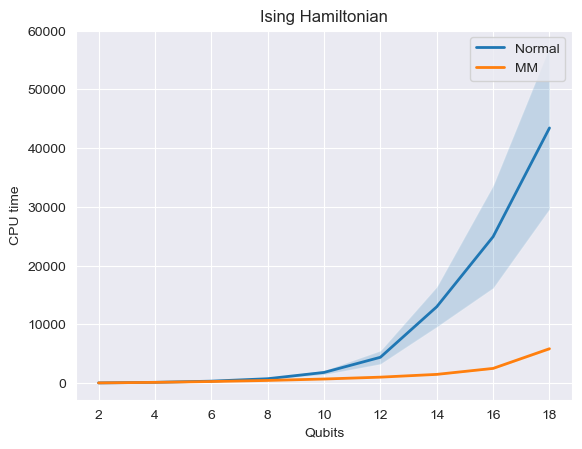

In [89]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

yn = np.array([np.mean(Ising_normal[i]) for i in range(9)])
yn_std = np.array([np.std(Ising_normal[i]) for i in range(9)])
ym = np.array([np.mean(Ising_MM[i]) for i in range(9)])
ym_std = np.array([np.std(Ising_MM[i]) for i in range(9)])


clrs = sns.color_palette("husl", 5)
with sns.axes_style("darkgrid"):
    plt.plot(Ni, yn, label="Normal",linewidth=2)
    plt.fill_between(Ni, yn-yn_std, yn+yn_std, alpha=0.2)
    plt.plot(Ni, ym, label="MM", linewidth=2)
    plt.fill_between(Ni, ym-ym_std, ym+ym_std, alpha=0.2)
    
    plt.legend()
    plt.ylabel("CPU time")
    plt.xlabel("Qubits")
    plt.title("Ising Hamiltonian")
    plt.show()

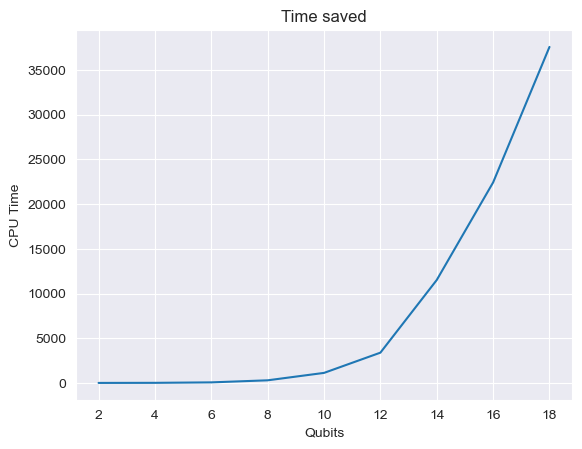

In [90]:
S = []
for i in range(9):
    S.append(yn[i] - ym[i])

with sns.axes_style("darkgrid"):    
    plt.plot(Ni, S)
    plt.title("Time saved")
    plt.ylabel("CPU Time")
    plt.xlabel("Qubits")
    plt.show()

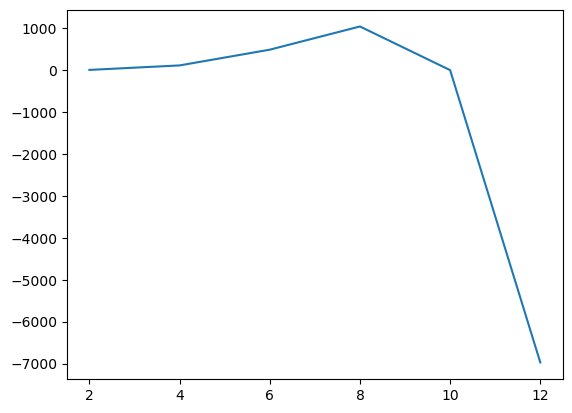

In [26]:
#plt.plot(Nm, Mol_normal)
#plt.plot(Nm, Mol_MM)

S = []
for i in range(6):
    S.append(Mol_normal[i]-Mol_MM[i])

plt.plot(Nm, S)

In [27]:
Mol_normal

[306.33009999999996, 10879.0528, 39575.1644, 67880.96290000001, 0, 338375.1761]

In [28]:
Mol_MM

[301.18899999999996,
 10766.8545,
 39087.61439999999,
 66839.8673,
 0,
 345348.99020000006]